In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.time_series import illustration,demo

In [8]:
#ARIMA biasa dipakai untuk data yang stationary

### Uji Stationarity Menggunakan ADF dan KPSS

In [2]:
from jcopml.time_series import stationarity_tester

## Stationary

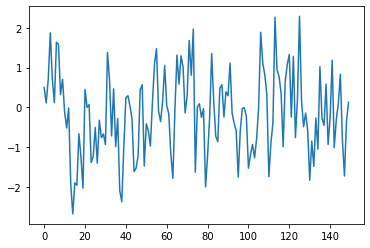

In [3]:
plt.plot(demo.stnry_data)

In [4]:
stationarity_tester(demo.stnry_data)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.863231,5.216419e-12,-3.475018,-2.881141,-2.577221,True
KPSS,0.131065,1.000000e-01,0.739000,0.463000,0.347000,False


## Trending

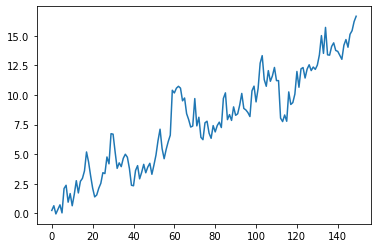

In [5]:
plt.plot(demo.trending_data)

In [6]:
stationarity_tester(demo.trending_data)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.077376,0.724009,-3.475325,-2.881275,-2.577293,False
KPSS,1.661763,0.010000,0.739000,0.463000,0.347000,True


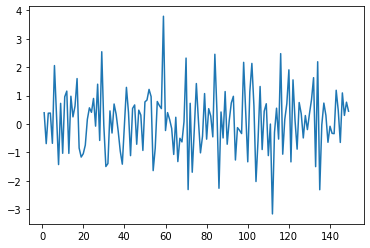

In [11]:
plt.plot(demo.trending_data.diff())

In [9]:
stationarity_tester(demo.trending_data.diff())

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-14.416320,8.048078e-27,-3.475325,-2.881275,-2.577293,True
KPSS,0.035351,1.000000e-01,0.739000,0.463000,0.347000,False


## Seasonal

In [12]:
df=pd.read_csv('data/perrin_freres_champagne.csv',index_col='date',parse_dates=['date'])
series=df.sales

C:\Users\irfanfadhullah\AppData\Local\Continuum\anaconda3\envs\jcop_ts\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


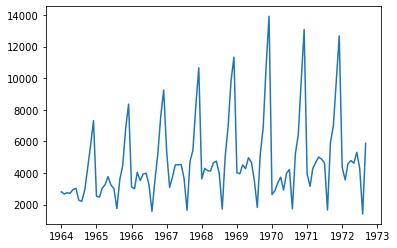

In [13]:
plt.plot(series)

In [14]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-1.833593,0.363916,-3.502705,-2.893158,-2.583637,False
KPSS,0.512672,0.038813,0.739000,0.463000,0.347000,True


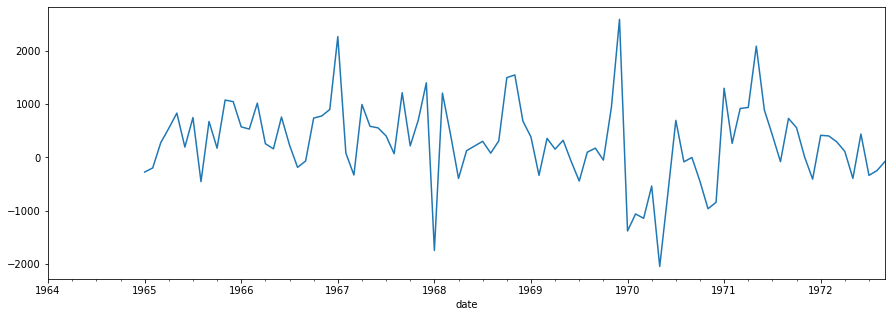

In [15]:
series.diff(12).plot(figsize=(15,5))

In [17]:
stationarity_tester(series.diff(12))

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-7.626619,2.060580e-11,-3.503515,-2.893508,-2.583824,True
KPSS,0.294397,1.000000e-01,0.739000,0.463000,0.347000,False


## Trend Seasonal

In [20]:
df=pd.read_csv('data/airline.csv',index_col='Date',parse_dates=['Date'])
series=df.passengers

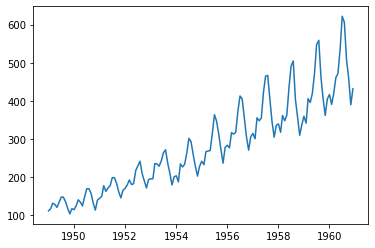

In [21]:
plt.plot(series)

In [22]:
stationarity_tester(series)

ADF:        Series is non-stationary
KPSS:       Series is non-stationary
Conclusion: Series is non-stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,0.815369,0.99188,-3.481682,-2.884042,-2.57877,False
KPSS,1.651312,0.01000,0.739000,0.463000,0.34700,True


In [24]:
from jcopml.time_series.decomposition import stl_decomposition

In [25]:
components = stl_decomposition(series)

In [26]:
stationarity_tester(components.resid)

ADF:        Series is stationary
KPSS:       Series is trend stationary
Conclusion: Series is stationary


,Test Statistic,p-value,Critical Value (1%),Critical Value (5%),Critical Value (10%),reject_null
ADF,-5.131467,0.000012,-3.480119,-2.883362,-2.578407,True
KPSS,0.021806,0.100000,0.739000,0.463000,0.347000,False


# AR vs MA

## ARMA --> ACF PACF

## Menentukan orde (AR)p

In [28]:
demo.AR1_simulation()

interactive(children=(FloatSlider(value=0.6, description='alpha1', max=2.0, min=-2.0), Output()), _dom_classes…

In [29]:
demo.AR2_simulation()

interactive(children=(FloatSlider(value=0.5, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=0.3, …

## Menentukan orde dari MA(q)

In [31]:
demo.MA1_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), Output()), _dom_classes…

In [32]:
demo.MA2_simulation()

interactive(children=(FloatSlider(value=0.6, description='theta1', max=2.0, min=-2.0), FloatSlider(value=0.6, …

## ARMA(p,q)

In [36]:
demo.AR2MA2_simulation()

interactive(children=(FloatSlider(value=0.7, description='alpha1', max=2.0, min=-2.0), FloatSlider(value=-0.4,…

## Nonstationary Series? ARIMA(p,d,q)

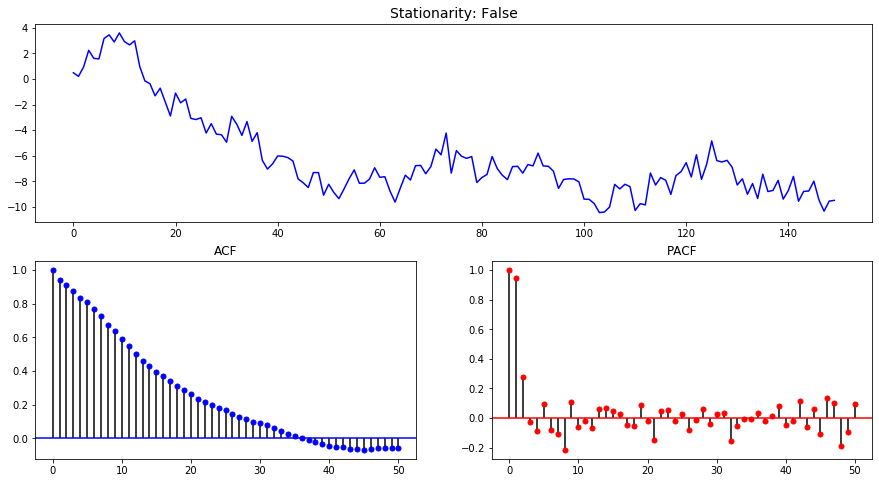

In [37]:
demo.nonstationarity_simulation()

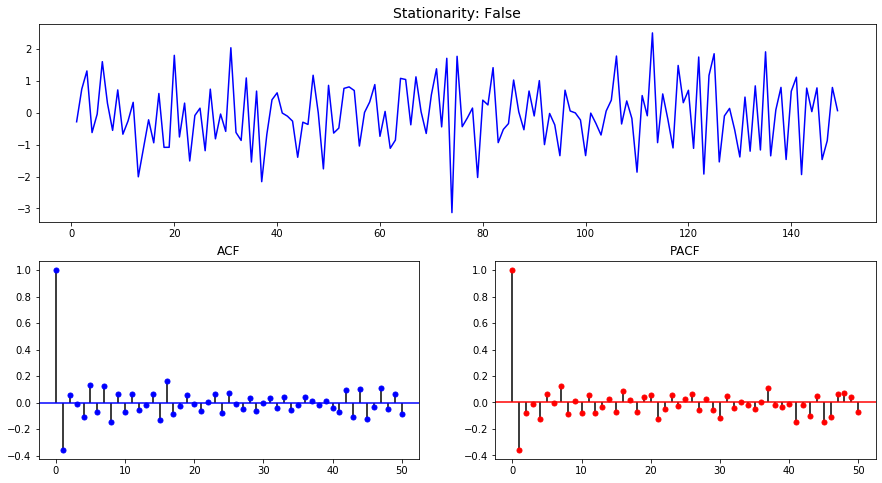

In [38]:
demo.nonstationarity_simulation(diff=True)

## Recommended Way --> Model Search dengan AIC, AICc, dan BIC

AIC =  Akaike Information Criterion <br>
AICC Corrected AIC <br>
BIC= Bayesian Information Criterion <br>
Mereka merupakan penilaian kualitas suatu model

## Auto ARIMA

In [40]:
from pmdarima import auto_arima

In [41]:
df=pd.read_csv('data/airline.csv',index_col='Date',parse_dates=['Date'])
series=df.passengers

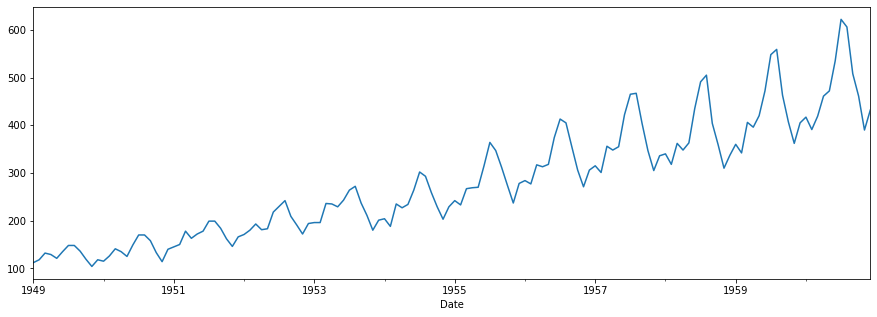

In [42]:
series.plot(figsize=(15,5))

In [43]:
X_train,X_test =series[:-25],series[-25:]

In [46]:
arima= auto_arima(X_train,seasonal=True,m=12,information_criterion='aicc',trace=True, suppress_warnings=True,random_state=42)

Performing stepwise search to minimize aicc
Fit ARIMA(2,0,2)x(1,1,1,12) [intercept=True]; AIC=805.863, BIC=827.246, Time=12.235 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=True]; AIC=899.922, BIC=905.268, Time=0.109 seconds
Fit ARIMA(1,0,0)x(1,1,0,12) [intercept=True]; AIC=803.454, BIC=814.145, Time=2.985 seconds
Fit ARIMA(0,0,1)x(0,1,1,12) [intercept=True]; AIC=852.518, BIC=863.209, Time=1.953 seconds
Fit ARIMA(0,0,0)x(0,1,0,12) [intercept=False]; AIC=1051.673, BIC=1054.346, Time=0.094 seconds
Fit ARIMA(1,0,0)x(0,1,0,12) [intercept=True]; AIC=802.257, BIC=810.275, Time=0.578 seconds
Fit ARIMA(1,0,0)x(0,1,1,12) [intercept=True]; AIC=803.527, BIC=814.218, Time=1.891 seconds
Fit ARIMA(1,0,0)x(1,1,1,12) [intercept=True]; AIC=805.382, BIC=818.746, Time=5.282 seconds
Fit ARIMA(2,0,0)x(0,1,0,12) [intercept=True]; AIC=801.679, BIC=812.370, Time=0.984 seconds
Fit ARIMA(2,0,0)x(1,1,0,12) [intercept=True]; AIC=803.256, BIC=816.620, Time=3.563 seconds
Fit ARIMA(2,0,0)x(0,1,1,12) [intercept=Tru

In [47]:
arima

ARIMA(maxiter=50, method='lbfgs', order=(2, 0, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [48]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  119
Model:             SARIMAX(2, 0, 0)x(0, 1, 0, 12)   Log Likelihood                -396.839
Date:                            Thu, 06 Aug 2020   AIC                            801.679
Time:                                    00:45:41   BIC                            812.370
Sample:                                         0   HQIC                           806.013
                                            - 119                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.5597      2.054      2.220      0.026       0.533       8.586
ar.L1          0.6701      0.100      6.694      0.000       0.474       0.866
ar.L2          0.1562      0.097      1.614      0.106      -0.033       0.346
sigma2        96.5155     11.915      8.101      0.000      73.163     119.868
===================================================================================
Ljung-Box (Q):                       41.29   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.41   Prob(JB):                         0.45
Heteroskedasticity (H):               1.47   Skew:                             0.00
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

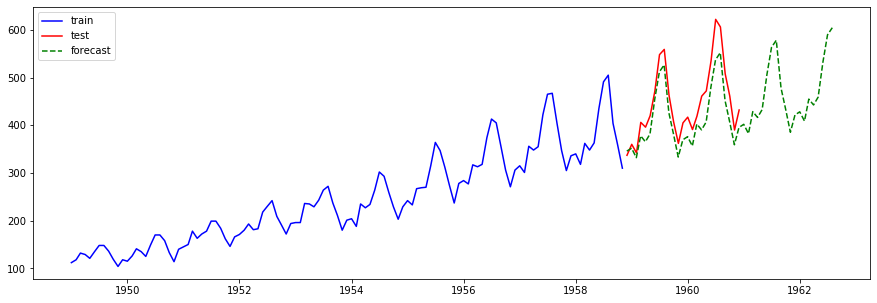

In [49]:
n_forecast = len(X_test)+20
pred = arima.predict(n_forecast)

dates= pd.date_range(X_train.index[-1],periods=n_forecast,freq='M')
pred =  pd.Series(pred,index=dates)

plt.figure(figsize=(15,5))
plt.plot(X_train,'b-',label='train')
plt.plot(X_test,'r-',label='test')
plt.plot(pred,'g--',label='forecast')
plt.legend()